In [51]:
import load_data
import plotting_functions as pfuncts
import stability_curve_calc as scc
import numpy as np
import matplotlib.pyplot as plt

import importlib
importlib.reload(pfuncts)
importlib.reload(scc)

from matplotlib import rcParams
from matplotlib import rcParamsDefault
from matplotlib import rc

rcParams.update(rcParamsDefault)

rc('font', **{'family': 'CMU Sans Serif'})
#rc('font', **{'family': 'CMU Serif'})
#rcParams["mathtext.fontset"] = "cm"

In [52]:
# load in data:
importlib.reload(scc)
importlib.reload(pfuncts)

# load in all needed data files for different Lambda but const phi_c
#ilename1 = "../plots/tmp-plots/paperplot-TLN-line-onlystable_phic-002_effectivesys-mu_0.500000_2513.274123.txt"
#ilename2 = "../plots/tmp-plots/paperplot-TLN-line-onlystable_phic-002_fullsys-mu_0.500000_2513.274123.txt"
#ilename3 = "../plots/tmp-plots/paperplot-TLN-line-onlystable_phic-002_effectivesys-mu_0.500000_1256.637061.txt"
#ilename4 = "../plots/tmp-plots/paperplot-TLN-line-onlystable_phic-002_fullsys-mu_0.500000_1256.637061.txt"
#ilename5 = "../plots/tmp-plots/paperplot-TLN-line-onlystable_phic-002_effectivesys-mu_0.500000_628.318531.txt"
#ilename6 = "../plots/tmp-plots/paperplot-TLN-line-onlystable_phic-002_fullsys-mu_0.500000_628.318531.txt"
#ilename7 = "../plots/tmp-plots/paperplot-TLN-line-onlystable_phic-002_effectivesys-mu_0.500000_62.831853.txt"
#ilename8 = "../plots/tmp-plots/paperplot-TLN-line-onlystable_phic-002_fullsys-mu_0.500000_62.831853.txt"

filename1 = "../plots/paperplot-TLN-line_phic-002_effectivesys-mu_0.500000_2513.274123.txt"
filename2 = "../plots/paperplot-TLN-line_phic-002_fullsys-mu_0.500000_2513.274123.txt"
filename3 = "../plots/paperplot-TLN-line_phic-002_effectivesys-mu_0.500000_1256.637061.txt"
filename4 = "../plots/paperplot-TLN-line_phic-002_fullsys-mu_0.500000_1256.637061.txt"
filename5 = "../plots/paperplot-TLN-line_phic-002_effectivesys-mu_0.500000_628.318531.txt"
filename6 = "../plots/paperplot-TLN-line_phic-002_fullsys-mu_0.500000_628.318531.txt"
filename7 = "../plots/paperplot-TLN-line_phic-002_effectivesys-mu_0.500000_62.831853.txt"
filename8 = "../plots/paperplot-TLN-line_phic-002_fullsys-mu_0.500000_62.831853.txt"

#for i in range(len(df)):
df1, indices1 = load_data.load_MRPhi_data(filename1)
df2, indices2 = load_data.load_MRPhi_data(filename2)
df3, indices3 = load_data.load_MRPhi_data(filename3)
df4, indices4 = load_data.load_MRPhi_data(filename4)
df5, indices5 = load_data.load_MRPhi_data(filename5)
df6, indices6 = load_data.load_MRPhi_data(filename6)
df7, indices7 = load_data.load_MRPhi_data(filename7)
df8, indices8 = load_data.load_MRPhi_data(filename8)

print(indices1)
print(indices2)

{'M_T': 0, 'rho_0': 1, 'phi_0': 2, 'R_F': 3, 'R_F_0': 4, 'M_F': 5, 'N_F': 6, 'R_B': 7, 'R_B_0': 8, 'M_B': 9, 'N_B': 10, 'M_B/M_F': 11, 'N_B/N_F': 12, 'C': 13, 'k2': 14, 'lambda_tidal': 15}
{'M_T': 0, 'rho_0': 1, 'phi_0': 2, 'R_F': 3, 'N_F': 4, 'R_B': 5, 'R_B_0': 6, 'N_B': 7, 'N_B/N_F': 8, 'omega': 9, 'mu': 10, 'lambda': 11, 'k2': 12, 'lambda_tidal': 13, 'phi_1_0': 14, 'H_0': 15}


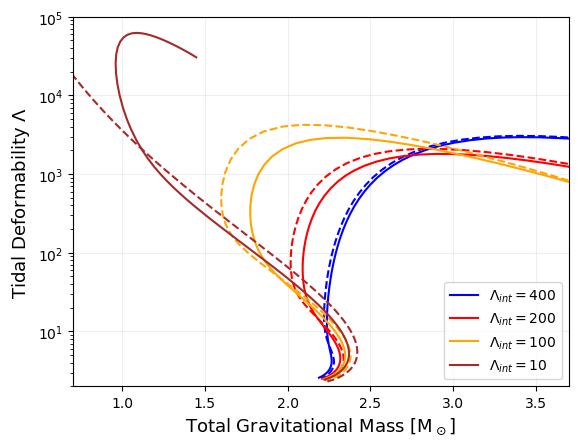

In [55]:
# here, define the plotting routines to make a nice looking plot:

# create/filter the data to be plotted:

filteredData1 = df1
allMasses1 = filteredData1[:,indices1['M_T']]
allTlns1 = filteredData1[:,indices1["lambda_tidal"]]
allDimlessTlns1 = allTlns1 / allMasses1**5
#--
filteredData2 = df2
allMasses2 = filteredData2[:,indices2['M_T']]
allTlns2 = filteredData2[:,indices2["lambda_tidal"]]
allDimlessTlns2 = allTlns2 / allMasses2**5
#--
filteredData3 = df3
allMasses3 = filteredData3[:,indices3['M_T']]
allTlns3 = filteredData3[:,indices3["lambda_tidal"]]
allDimlessTlns3 = allTlns3 / allMasses3**5
#--
filteredData4 = df4
allMasses4 = filteredData4[:,indices4['M_T']]
allTlns4 = filteredData4[:,indices4["lambda_tidal"]]
allDimlessTlns4 = allTlns4 / allMasses4**5
#--
filteredData5 = df5
allMasses5 = filteredData5[:,indices5['M_T']]
allTlns5 = filteredData5[:,indices5["lambda_tidal"]]
allDimlessTlns5 = allTlns5 / allMasses5**5
#--
filteredData6 = df6
allMasses6 = filteredData6[:,indices6['M_T']]
allTlns6 = filteredData6[:,indices6["lambda_tidal"]]
allDimlessTlns6 = allTlns6 / allMasses6**5
#--
filteredData7 = df7
allMasses7 = filteredData7[:,indices7['M_T']]
allTlns7 = filteredData7[:,indices7["lambda_tidal"]]
allDimlessTlns7 = allTlns7 / allMasses7**5
#--
filteredData8 = df8
allMasses8 = filteredData8[:,indices2['M_T']]
allTlns8 = filteredData8[:,indices8["lambda_tidal"]]
allDimlessTlns8 = allTlns8 / allMasses8**5

# ----------------------------------------------------------

# define plot configurations etc:
#ylim = [1, 1e6], xlim = [0, 3]
tickFontSize = 13

fig = plt.figure()
plt.xlim([0.7, 3.7])
plt.ylim([2., 1e5])
plt.yscale("log")

plt.ylabel(r"Tidal Deformability $\Lambda$", fontsize = tickFontSize)
plt.xlabel(r"Total Gravitational Mass [M$_\odot$]", fontsize = tickFontSize)
#plt.tick_params(axis='both', which='major', labelsize=tickFontSize)
plt.grid(alpha=0.2, linestyle="-")

#for j in range(len(df)):
#plt.plot(allMasses[0], allDimlessTlns[0], label = "$\phi_c = 0.02$")
#plt.plot(allMasses[1], allDimlessTlns[1], label = "$\phi_c = 0.02$")
# -------
plt.plot(allMasses1, allDimlessTlns1, linestyle = "--", c = "blue")
plt.plot(allMasses2, allDimlessTlns2, linestyle = "-", label="$\Lambda_{int}=400$", c = "blue")

plt.plot(allMasses3, allDimlessTlns3, linestyle = "--", c = "red")
plt.plot(allMasses4, allDimlessTlns4, linestyle = "-", label="$\Lambda_{int}=200$", c = "red")

plt.plot(allMasses5, allDimlessTlns5, linestyle = "--", c = "orange")
plt.plot(allMasses6, allDimlessTlns6, linestyle = "-", label="$\Lambda_{int}=100$", c = "orange")

plt.plot(allMasses7, allDimlessTlns7, linestyle = "--", c = "brown")
plt.plot(allMasses8, allDimlessTlns8, linestyle = "-", label="$\Lambda_{int}=10$", c = "brown")
# -------

plt.legend(loc="lower right")

#print(filteredData1[:,indices1["lambda_tidal"]])
#print(filteredData2[:,indices2["lambda_tidal"]])

#plt.show()
plt.savefig("plots/TLN-full-eff-comparison-Lambda_int1.pdf", bbox_inches='tight')
plt.show()

Note: lambda_int = 400 go from rho_c = 2.5 - 10 rho_sat.
lambda_int = 100 and 100: I will try to change the lower rho_c to maybe a smaller value e.g. 1.0*rho_sat
also try lambda_int=100 to go down to rho_c=0.5